## Code and Results

Epoch [1/35], Step [100/938]
Epoch [1/35], Step [200/938]
Epoch [1/35], Step [300/938]
Epoch [1/35], Step [400/938]
Epoch [1/35], Step [500/938]
Epoch [1/35], Step [600/938]
Epoch [1/35], Step [700/938]
Epoch [1/35], Step [800/938]
Epoch [1/35], Step [900/938]
Epoch [1/35], Average Loss: 0.7664
Epoch [2/35], Step [100/938]
Epoch [2/35], Step [200/938]
Epoch [2/35], Step [300/938]
Epoch [2/35], Step [400/938]
Epoch [2/35], Step [500/938]
Epoch [2/35], Step [600/938]
Epoch [2/35], Step [700/938]
Epoch [2/35], Step [800/938]
Epoch [2/35], Step [900/938]
Epoch [2/35], Average Loss: 0.4473
Epoch [3/35], Step [100/938]
Epoch [3/35], Step [200/938]
Epoch [3/35], Step [300/938]
Epoch [3/35], Step [400/938]
Epoch [3/35], Step [500/938]
Epoch [3/35], Step [600/938]
Epoch [3/35], Step [700/938]
Epoch [3/35], Step [800/938]
Epoch [3/35], Step [900/938]
Epoch [3/35], Average Loss: 0.3962
Epoch [4/35], Step [100/938]
Epoch [4/35], Step [200/938]
Epoch [4/35], Step [300/938]
Epoch [4/35], Step [400/9

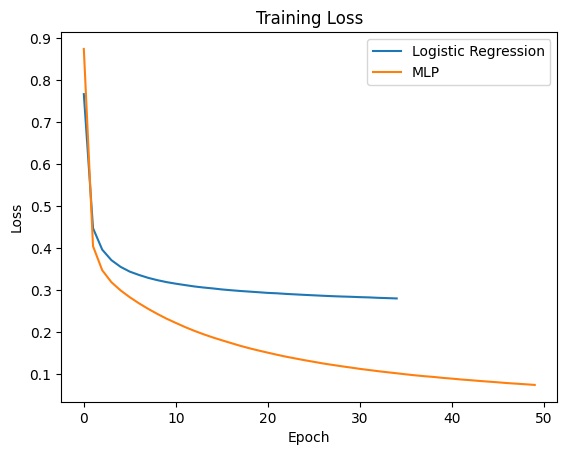

Accuracy of the model on the test images: 92.14%
Accuracy of the model on the test images: 97.21%
Models saved successfully.


In [5]:
import torch
from torchvision import datasets, transforms
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

class LogisticRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegression, self).__init__()
        self.layer1 = nn.Linear(input_dim, output_dim, bias=True)
    
    def forward(self, x):
        x = self.layer1(x)
        return x


class MLP(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(MLP, self).__init__()
        self.layer1 = nn.Linear(input_dim, hidden_dim, bias=True)
        self.layer2 = nn.Linear(hidden_dim, output_dim, bias=True)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        return x

def train_model(model, train_loader, criterion, optimizer, num_epochs=10):
    model.train()  # 设置模型为训练模式    
    losses = []  # ⽤于存储每个epoch的损失
    for epoch in range(num_epochs):
        epoch_loss = 0.0
        for i, (images, labels) in enumerate(train_loader): #每次load一个batch
            # 将图像展平为向量（适⽤于全连接⽹络）            
            images = images.view(-1, 28 * 28)

            # 前向传播
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            # 反向传播和优化            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            # 记录损失            
            epoch_loss += loss.item()
            if (i + 1) % 100 == 0:
                print(f'Epoch [{epoch + 1}/{num_epochs}], Step [{i + 1}/{len(train_loader)}]')
        
        # 记录每个epoch的平均损失        
        losses.append(epoch_loss / len(train_loader))
        print(f'Epoch [{epoch + 1}/{num_epochs}], Average Loss: {losses[-1]:.4f}')
    
    return losses

# 测试模型
def test_model(model, test_loader):
    model.eval()  # 设置模型为评估模式
    correct = 0
    total = 0
    with torch.no_grad():  # 禁⽤梯度计算        
          for images, labels in test_loader:    #每次load一个batch
            # 将图像展平为向量（适⽤于全连接⽹络）
            images = images.view(-1, 28 * 28)
            # 将图像展平为向量（适⽤于全连接⽹络）
            images = images.view(-1, 28 * 28)

            # 前向传播            
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)  # 获取预测结果
            
            # 统计正确预测的数量
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    accuracy = 100 * correct / total
    print(f'Accuracy of the model on the test images: {accuracy:.2f}%')
    return accuracy


if __name__ == '__main__':
    # 定义数据预处理
    transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
    ])
    # 下载并加载训练集和测试集
    train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
    test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
    train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
    test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)
    # 初始化模型
    model_logistic = LogisticRegression(input_dim=28*28, output_dim=10)
    model_mlp = MLP(input_dim=28*28, hidden_dim=128, output_dim=10)
    # 定义损失函数和优化器
    criterion = nn.CrossEntropyLoss()
    optimizer_logistic = optim.SGD(model_logistic.parameters(), lr=0.005)
    optimizer_mlp = optim.SGD(model_mlp.parameters(), lr=0.007)

    # 训练模型
    losses_logi = train_model(model_logistic, train_loader, criterion, optimizer_logistic, num_epochs=35)
    losses_mlp = train_model(model_mlp, train_loader, criterion, optimizer_mlp, num_epochs=50)
    # 绘制损失曲线
    plt.plot(losses_logi, label='Logistic Regression')
    plt.plot(losses_mlp, label='MLP')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss')
    plt.legend()
    plt.show()
    # 测试模型
    test_model(model_logistic, test_loader)
    test_model(model_mlp, test_loader)
    # 保存模型
    torch.save(model_logistic.state_dict(), 'logistic_model.pth')
    torch.save(model_mlp.state_dict(), 'mlp_model.pth')
    print('Models saved successfully.')





## Discussion and Conclusion
Logistic and MLP models have similar performance in terms of accuracy and loss. 
The MLP model has a higher accuracy and lower loss compared to the Logistic model. This suggests that the MLP model may be more suitable for this task, especially if the dataset is more complex and nonlinear. 

However, MLP requires more training time and computational resources than Logistic model.(I trained MLP for 50 epochs and Logistic Regression for 35 epochs) Therefore, it is important to consider the trade-off between accuracy and training time when choosing a model for this task.
